# Minimun Spanning Tree

- ทำการนำ library ที่ใช้งานเข้ามาใน Program เเละเเสดงข้อมูล

In [185]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# อ่าน Data จากไฟล์ CSV
# data = pd.read_csv('filename.csv', index_col=0)
# อ่าน Dats จากไฟล์ XLSX
# data = pd.read_excel('filename.xlsx', index_col=0)
data


,a,b,c,d,e,f
a,NaN,6.0,3.0,NaN,NaN,NaN
b,6.0,NaN,2.0,5.0,NaN,NaN
c,3.0,2.0,NaN,3.0,4.0,NaN
d,NaN,5.0,3.0,NaN,2.0,3.0
e,NaN,NaN,4.0,2.0,NaN,5.0
f,NaN,NaN,NaN,3.0,5.0,NaN


- ทำการลบเเถวที่เป็น NaN ออกไป

In [186]:
data = data.dropna(axis=0, how='all')
data

,a,b,c,d,e,f
a,NaN,6.0,3.0,NaN,NaN,NaN
b,6.0,NaN,2.0,5.0,NaN,NaN
c,3.0,2.0,NaN,3.0,4.0,NaN
d,NaN,5.0,3.0,NaN,2.0,3.0
e,NaN,NaN,4.0,2.0,NaN,5.0
f,NaN,NaN,NaN,3.0,5.0,NaN


- เเสดงชนิดข้อมูลของใน เเต่ละ column

In [187]:
data.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
dtype: object

- ทำการเปลี่ยนข้อมูลที่ NaN ให้เป็น 0 เเละเปลี่ยนข้อมูลที่เป็นตัวเลขที่มีทศนิยมที่มี .0 ให้เป็นจำนวนเต็ม

In [188]:
# g2
# column = ['a','b','c','d','e','f','g','h','i','j']

# g1
column = ['a','b','c','d','e','f']

data[column] = data[column].apply(lambda x: x.fillna(0).replace([float('inf')], 0).astype(int))
data

,a,b,c,d,e,f
a,0,6,3,0,0,0
b,6,0,2,5,0,0
c,3,2,0,3,4,0
d,0,5,3,0,2,3
e,0,0,4,2,0,5
f,0,0,0,3,5,0


- เเสดงข้อมูลออกมาโดยให้เป็นรูปแบบของตารางแบบ Adjaency Matrix

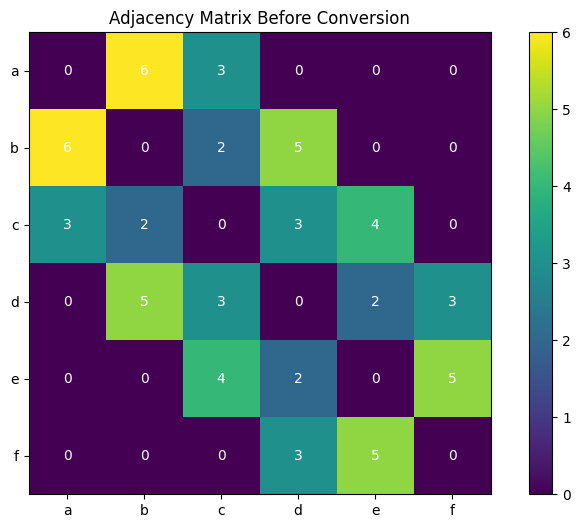

In [189]:
plt.figure(figsize=(10, 6))
plt.title('Adjacency Matrix Before Conversion')
plt.imshow(data.values, cmap='viridis', interpolation='none')

# เพิ่มข้อมูลลงในแต่ละช่อง
for i in range(len(data)):
    for j in range(len(data)):
        plt.text(j, i, str(data.iloc[i, j]), ha='center', va='center', color='white')

plt.xticks(np.arange(len(data)), labels=data.columns)
plt.yticks(np.arange(len(data)), labels=data.index)
plt.colorbar()
plt.show()

- เเสดงข้อมูลออกมาโดยให้เป็นรูปแบบของกราฟแบบ Network

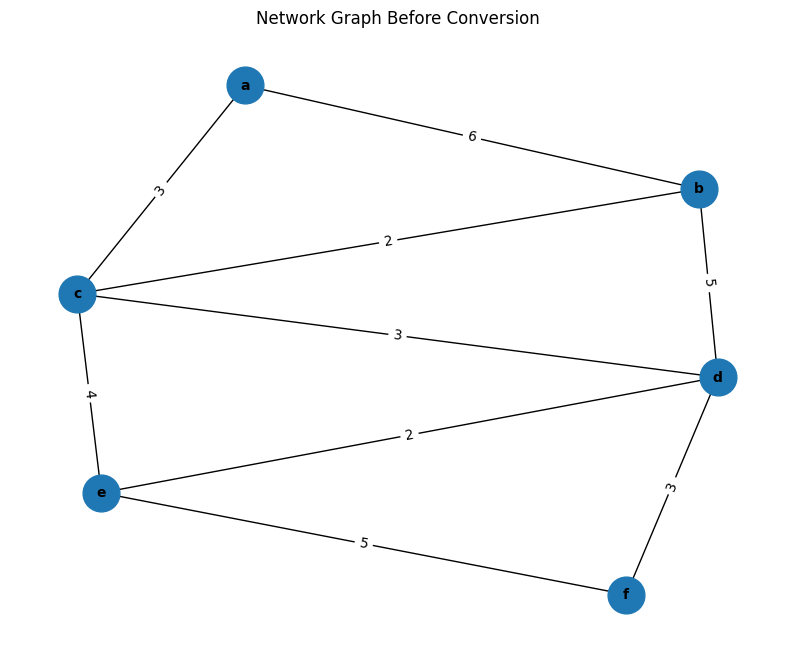

In [195]:
# สร้าง network graph ก่อนการแปลง
G_before = nx.Graph()

# เพิ่มเส้นเชื่อมระหว่างโหนดตาม Adjacency Matrix
for i, node1 in enumerate(data.columns):
    for j, node2 in enumerate(data.columns):
        weight = data.iat[i, j]
        if weight > 0:
            G_before.add_edge(node1, node2, weight=weight)

plt.figure(figsize=(10, 8))
plt.title('Network Graph Before Conversion')
pos = nx.spring_layout(G_before)
nx.draw(G_before, pos, with_labels=True, node_size=700, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G_before, pos, edge_labels={(edge[0], edge[1]): G_before[edge[0]][edge[1]]['weight'] for edge in G_before.edges()})
plt.show()

- ทำการดึงข้อมูลเพื่อจะมาทำเป็น Minimum Spanning Tree

In [191]:
# สร้างกราฟ
G = nx.Graph()

# เพิ่มเส้นเชื่อมระหว่างโหนดตาม Adjacency Matrix
for node1 in data.index:
    for node2 in data.columns:
        weight = data.at[node1, node2]
        if weight > 0:
            G.add_edge(node1, node2, weight=weight)


In [192]:
# หา Minimum Spanning Tree (MST) โดยใช้ Kruskal's Algorithm
mst = nx.minimum_spanning_tree(G)

- เเสดงข้อมูลที่ได้จาก Minimum Spanning Tree ออกมาเป็นกราฟ Network 

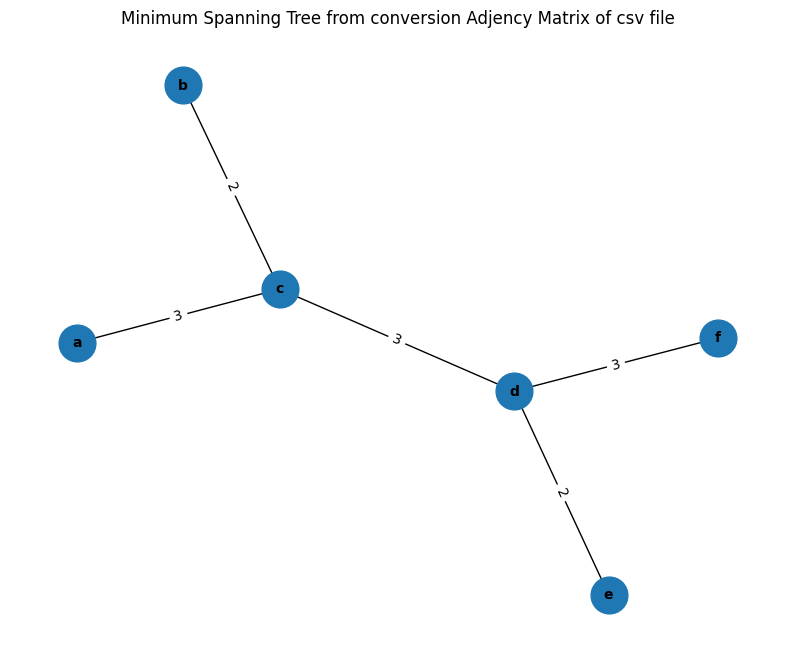

In [193]:
# แสดง MST
pos = nx.spring_layout(mst)  # กำหนดลักษณะการแสดงกราฟ
plt.figure(figsize=(10, 8))
plt.title('Minimum Spanning Tree from conversion Adjency Matrix of csv file')
nx.draw(mst, pos, with_labels=True, node_size=700, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(mst, pos, edge_labels={(edge[0], edge[1]): mst[edge[0]][edge[1]]['weight'] for edge in mst.edges})
plt.show()

- เเสดงข้อมูลที่ได้จาก Minimum Spanning Tree ออกมาเป็นตารางแบบ Adjacency Matrix

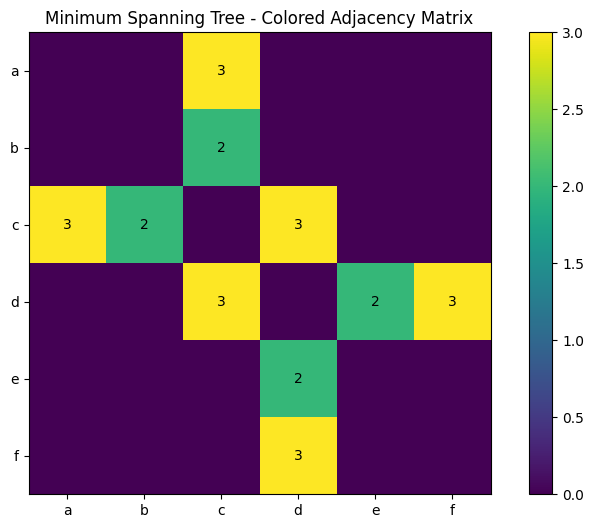

In [194]:
# สร้าง กราฟ จาก ชุดข้อมูล
G = nx.from_pandas_adjacency(data)

# ทำการหา Minimum Spanning Tree
mst = nx.minimum_spanning_tree(G)

# แปลง MST ไป NumPy matrix
mst_matrix = nx.to_numpy_array(mst)

# เเสดงผล MST เป็นกราฟแบบ Adjacency Matrix 
plt.figure(figsize=(10, 6))
plt.title('Minimum Spanning Tree - Colored Adjacency Matrix')
cax = plt.imshow(mst_matrix, cmap='viridis', interpolation='none', vmin=np.min(mst_matrix), vmax=np.max(mst_matrix))

# Add labels to the cells with non-zero weight in MST
for i in range(len(data)):
    for j in range(len(data)):
        weight = data.iat[i, j]
        if weight > 0 and mst_matrix[i, j] > 0:
            plt.text(j, i, str(weight), ha='center', va='center', color='black')

# Set x and y axis labels
plt.xticks(np.arange(len(data)), labels=data.columns)
plt.yticks(np.arange(len(data)), labels=data.index)

# ใส่สีในข้อมูล
plt.colorbar(cax)

plt.show()